# 2.3
## a)
A Markov Decision Process (MDP) consists of:
 * States (S)
 * Actions (A)
 * Transition Probabilities for states and actions p(s'|s, a)
 * Rewards r : S X A 
 * discount factor of [0,1]
 
Here, S is the observation space containing (cart position [-4.8,4.8], velocity [-inf,inf], pole angle [-0.41887903 ,0.41887903], pole velocity [-inf,inf]).

A is our action space containing 0 or 1 as actions to apply force to the cart left or right.

The force is not constant and depends on the angle of the pole as well.

The reward structure of the environment defaults to +1 for every step taken until the pole is tilted over 12° or the cart reaches the borders.

However, to create a policy, a reward structure depending on the observation space is much more effective than just looking if the end criteria are not met. A potential function for that would give higher rewards for keeping the velocities low, the cart centered, and the pole straight. It could look like:
    r = a * r_cart_pos + b * r_cart_vel + c * pole_pos + d * pole_vel
Here a,b,c,d are weights for the secondary reward functions for the four observations.

Below, there is a simulation of the environment with the agent taking a random action every step.




In [15]:
import numpy as np
import gymnasium as gym
env = gym.make("CartPole-v1", render_mode="human")

for i in range(10):
    state, info = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # Random Action
        next_state, reward, done, _, _ = env.step(action)
        
        state = next_state  # Update state



## b)
The implemented policy will be based on the current state. The action will be choosed based on a simple function determining the direction of the cart. If it is negative, left will be chosen and vice versa. The function contains all four elements of the observation space with weight factors for them.

    res = a * self.r_cart_pos + b * self.r_cart_vel + c * self.r_pole_angle + d * self.r_pole_vel

The four components are just the values of the observation, however the cart position and velocities are inverted, because the cart should ideally be centered. 

In [16]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
env = gym.make("CartPole-v1", render_mode="rgb_array")

class Agent:
    def __init__(self):
        pass



    def choose_action(self,state,a=1,b=1,c=1,d=1):
       
        result = a * self.r_cart_pos(state) + b * self.r_cart_vel(state) + c * self.r_pole_angle(state) + d * self.r_pole_vel(state) 
        if result > 0:
            return self.move_right()
        else:
            return self.move_left()

    def r_cart_pos(self,state):
        return -state[0] # Negative for movement to the opposite direction
    def r_cart_vel(self,state):
        return -state[1] # Negative for movement to the opposite direction
    def r_pole_angle(self,state):
        return state[2] 
    def r_pole_vel(self,state):
        return state[3]
    def move_left(self):
        return 0

    def move_right(self):
        return 1
    
    def execute(self, num_episodes=100, a = 1, b = 1, c = 1, d = 1):
        rewards = []
        for i in range(num_episodes):
            state, info = env.reset()
            total_reward = 0
            done = False
            while not done:
                action = self.choose_action(state,a,b,c,d)
                next_state, reward, done, _, _ = env.step(action)
                total_reward += reward
                state = next_state
            rewards.append(total_reward)
        return rewards
        

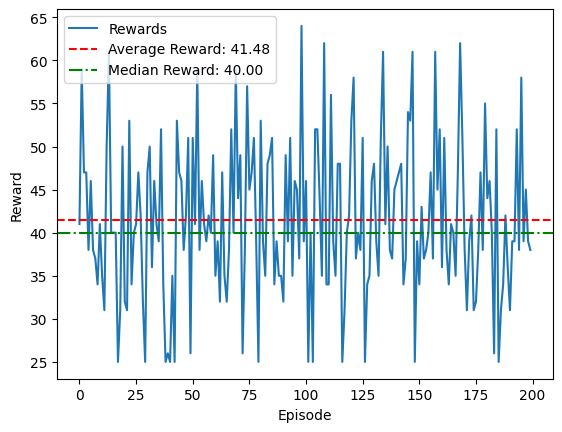

In [17]:
agent = Agent()
rewards = agent.execute(num_episodes=200, a=0, b=0, c=1, d=0) 
# Plot the rewards
plt.plot(rewards, label='Rewards')

# Calculate and plot the average reward
average_reward = np.mean(rewards)
plt.axhline(y=average_reward, color='r', linestyle='--', label=f'Average Reward: {average_reward:.2f}')
median_reward = np.median(rewards)
plt.axhline(y=median_reward, color='g', linestyle='-.', label=f'Median Reward: {median_reward:.2f}')

# Add labels and legend
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()

# Show the plot
plt.show()

The first configuration only checks the pole angle (all other weights are 0). This results in a low average reward of around 40.

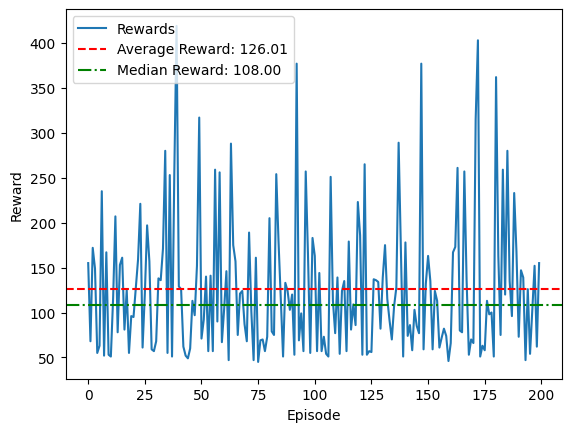

In [18]:
agent = Agent()
rewards = agent.execute(num_episodes=200, a=1, b=1, c=1, d=1) 
# Plot the rewards
plt.plot(rewards, label='Rewards')

# Calculate and plot the average reward
average_reward = np.mean(rewards)
plt.axhline(y=average_reward, color='r', linestyle='--', label=f'Average Reward: {average_reward:.2f}')
median_reward = np.median(rewards)
plt.axhline(y=median_reward, color='g', linestyle='-.', label=f'Median Reward: {median_reward:.2f}')

# Add labels and legend
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()

# Show the plot
plt.show()

By setting all weights to 1, the average reward increases to around 130. However, it appears the the pole orientation is more important than the cart position, so those weights will be increased next.

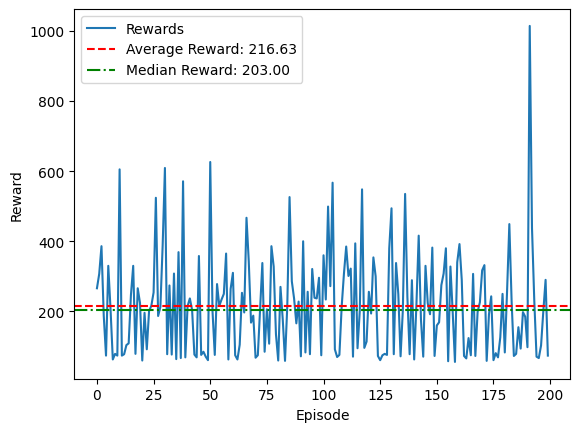

In [19]:
agent = Agent()
rewards = agent.execute(num_episodes=200, a=1, b=1, c=2, d=2) 
# Plot the rewards
plt.plot(rewards, label='Rewards')

# Calculate and plot the average reward
average_reward = np.mean(rewards)
plt.axhline(y=average_reward, color='r', linestyle='--', label=f'Average Reward: {average_reward:.2f}')
median_reward = np.median(rewards)
plt.axhline(y=median_reward, color='g', linestyle='-.', label=f'Median Reward: {median_reward:.2f}')

# Add labels and legend
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()

# Show the plot
plt.show()

Doubling the pole weights results in an average reward of around 250. 

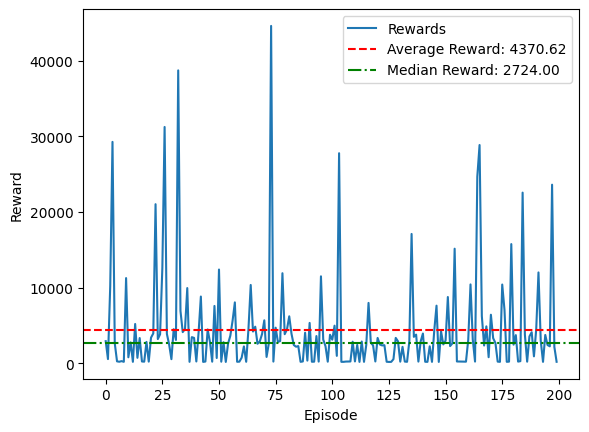

Lowest 10 rewards: [165.0, 165.0, 166.0, 168.0, 168.0, 169.0, 173.0, 174.0, 174.0, 175.0]


In [20]:
agent = Agent()
rewards = agent.execute(num_episodes=200, a=0.01, b=0.1, c=2, d=3) 
# Plot the rewards
plt.plot(rewards, label='Rewards')

# Calculate and plot the average reward
average_reward = np.mean(rewards)
plt.axhline(y=average_reward, color='r', linestyle='--', label=f'Average Reward: {average_reward:.2f}')
median_reward = np.median(rewards)
plt.axhline(y=median_reward, color='g', linestyle='-.', label=f'Median Reward: {median_reward:.2f}')

# Add labels and legend
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()

# Show the plot
plt.show()
rewards.sort()
print(f"Lowest 10 rewards: {rewards[0:10]}")


By testing out differrent weights, it appears that the pole orientation and velocity are the most important.

The cart position and velocity do not matter as much, so low values will cause the cart to move to the center only if the pole is straight.

This setup results in an average reward of around 4500, a median of around 2500 and the lowest rewards here is around 160, getting close to the required reward of 200 but not consistently reaching it. 

This is due to the fact that balancing a pole is easier than stabilizing it in the beginning, causing starting positions with a larger tilt to fail. 

## c)
In order to get a discrete observation space, a wrapper is used to discretize the observations. 
This is done by setting maximal and minimal values for the velocities, which are not limited by default.
Additionally, all observations are rounded to the second decimal point.  

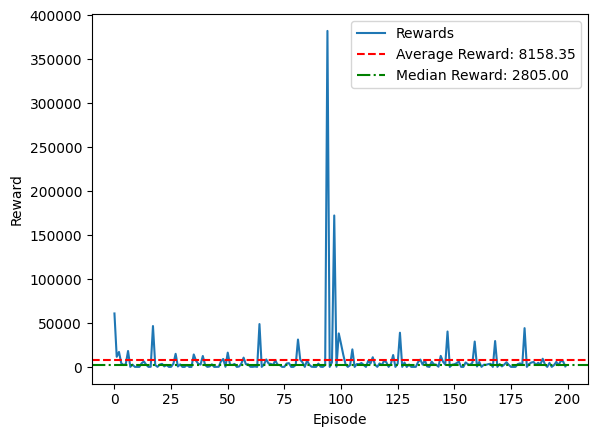

In [21]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from gymnasium import ObservationWrapper
from gymnasium.spaces import Discrete, Box

class DiscretizeObservation(ObservationWrapper):
    def __init__(self, env,):
        super().__init__(env)
        self.obs_space_high = env.observation_space.high
        self.obs_space_low = env.observation_space.low
        self.obs_space_high[1] = 0.5  # Clip the velocity
        self.obs_space_low[1] = -0.5  # Clip the velocity
        self.obs_space_high[3] = np.radians(50)  # Clip the pole velocity
        self.obs_space_low[3] = -np.radians(50)  # Clip the pole velocity
    
    def discretize(self, state):
        return np.around(state, decimals = 2)
        

    def observation(self, observation):
        return self.discretize(observation)

env = gym.make("CartPole-v1", render_mode="rgb_array")
env = DiscretizeObservation(env)

class Agent_discrete:
    def choose_action(self, state, a=1, b=1, c=1, d=1):
        result = a * self.r_cart_pos(state) + b * self.r_cart_vel(state) + c * self.r_pole_angle(state) + d * self.r_pole_vel(state)
        if result > 0:
            return self.move_right()
        else:
            return self.move_left()

    def r_cart_pos(self, state):
        return -state[0]  # Negative for movement to the opposite direction

    def r_cart_vel(self, state):
        return -state[1]  # Negative for movement to the opposite direction

    def r_pole_angle(self, state):
        return state[2]

    def r_pole_vel(self, state):
        return state[3]

    def move_left(self):
        return 0

    def move_right(self):
        return 1
    
    def execute(self, num_episodes=200, a = 1, b = 1, c = 1, d = 1):
        rewards = []
        for i in range(num_episodes):
            state, info = env.reset()
            total_reward = 0
            done = False
            while not done:
                action = self.choose_action(state,a,b,c,d)
                next_state, reward, done, _, _ = env.step(action)
                total_reward += reward
                state = next_state
            rewards.append(total_reward)
        return rewards
        

agent = Agent_discrete()
rewards = []

rewards = agent.execute(num_episodes=200, a=0.01, b=0.1, c=2, d=3)

# Plot the rewards
plt.plot(rewards, label='Rewards')

# Calculate and plot the average reward
average_reward = np.mean(rewards)
plt.axhline(y=average_reward, color='r', linestyle='--', label=f'Average Reward: {average_reward:.2f}')

# Calculate and plot the median reward
median_reward = np.median(rewards)
plt.axhline(y=median_reward, color='g', linestyle='-.', label=f'Median Reward: {median_reward:.2f}')

# Add labels and legend
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()

# Show the plot
plt.show()

The agent implemented in b) still works here.